In [1]:
import numpy as np
import pandas as pd
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)

<module 'QrModels' from 'D:\\netSVG\\QrModels.py'>

In [2]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [3]:
X_test,Y_test = dataset.get_functional_test_data()

print("x_test:")
print(X_test)
print("y_test:")
print(Y_test)

x_test:
[[0.8492 0.3298]
 [0.7384 0.7672]
 [0.4299 0.1582]
 [0.2072 0.2864]
 [0.3234 0.6871]
 [0.3752 0.5121]
 [0.8171 0.7321]
 [0.5317 0.7498]
 [0.7743 0.2395]
 [0.3346 0.6629]
 [0.5746 0.8162]
 [0.8639 0.7939]
 [0.1986 0.4691]
 [0.6725 0.3095]
 [0.9018 0.6876]
 [0.4965 0.8296]
 [0.4128 0.068 ]
 [0.2343 0.6137]
 [0.775  0.8715]
 [0.9122 0.7888]]
y_test:
[0.9312 1.311  1.605  1.6383 2.7847 2.6119 1.8783 1.5906 0.6192 2.8536
 1.0994 1.8812 2.8353 0.2018 2.8333 1.2912 1.6482 3.3226 0.9821 2.3591]


In [4]:
X_train,Y_train = dataset.get_functional_train_data()

print("x_train:")
print(X_train)
print("y_train:")
print(Y_train)

x_train:
[[0.4522 0.3192]
 [0.3904 0.2042]
 [0.9764 0.07  ]
 [0.5233 0.95  ]
 [0.1109 0.1412]
 [0.3299 0.7213]
 [0.3421 0.9288]
 [0.5211 0.4073]
 [0.1203 0.5209]
 [0.6255 0.2191]
 [0.3466 0.8424]
 [0.1992 0.9869]
 [0.2983 0.7699]
 [0.8899 0.7061]
 [0.5014 0.5953]
 [0.277  0.7529]
 [0.534  0.4967]
 [0.5743 0.8651]
 [0.0148 0.9685]
 [0.7028 0.0988]
 [0.5067 0.547 ]
 [0.3813 0.403 ]
 [0.0649 0.107 ]
 [0.3586 0.7242]
 [0.2035 0.783 ]
 [0.8138 0.5666]
 [0.3934 0.8113]
 [0.0536 0.5768]
 [0.3751 0.944 ]
 [0.1653 0.5076]]
y_train:
[0.7824 1.4808 2.7607 1.1487 2.4417 2.5728 1.8034 1.1039 3.2106 0.5796
 1.8635 2.5832 2.4064 2.621  2.3293 2.5767 1.8732 0.9187 2.2113 1.0467
 2.2373 1.6296 2.3883 2.4399 2.5703 2.3635 1.8007 3.2736 1.7206 3.154 ]


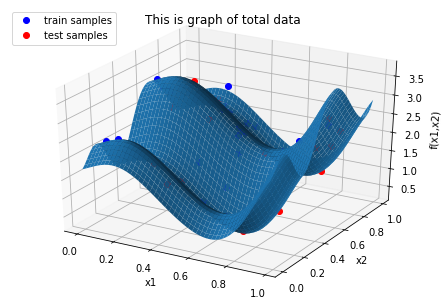

In [5]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)


In [6]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [7]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [8]:
length = sample.get_sample_length(X_train,imp)


欧氏距离：
[0.    0.017 0.337 0.403 0.148 0.177 0.384 0.013 0.151 0.04  0.285 0.51
 0.227 0.341 0.079 0.219 0.038 0.313 0.613 0.111 0.055 0.012 0.195 0.173
 0.277 0.192 0.246 0.225 0.396 0.118 0.017 0.    0.361 0.574 0.082 0.271
 0.527 0.058 0.173 0.055 0.409 0.649 0.328 0.501 0.165 0.314 0.106 0.471
 0.725 0.109 0.131 0.04  0.115 0.271 0.37  0.311 0.369 0.252 0.548 0.143
 0.337 0.361 0.    0.98  0.754 0.842 1.14  0.321 0.936 0.145 0.993 1.445
 0.95  0.412 0.502 0.956 0.378 0.794 1.732 0.076 0.448 0.465 0.832 0.81
 1.106 0.273 0.889 1.108 1.125 0.849 0.403 0.574 0.98  0.    0.824 0.09
 0.033 0.295 0.347 0.545 0.043 0.106 0.083 0.194 0.126 0.1   0.206 0.01
 0.259 0.757 0.163 0.319 0.921 0.078 0.13  0.231 0.036 0.36  0.022 0.324
 0.148 0.082 0.754 0.824 0.    0.384 0.674 0.239 0.144 0.271 0.547 0.723
 0.43  0.926 0.359 0.402 0.305 0.739 0.694 0.352 0.321 0.142 0.003 0.401
 0.42  0.675 0.529 0.193 0.714 0.137 0.177 0.271 0.842 0.09  0.384 0.
 0.043 0.135 0.084 0.34  0.015 0.088 0.003 0.314 0.0

In [9]:
L = sample.get_x_len(X_train)

X_train.T:
[[0.4522 0.3904 0.9764 0.5233 0.1109 0.3299 0.3421 0.5211 0.1203 0.6255
  0.3466 0.1992 0.2983 0.8899 0.5014 0.277  0.534  0.5743 0.0148 0.7028
  0.5067 0.3813 0.0649 0.3586 0.2035 0.8138 0.3934 0.0536 0.3751 0.1653]
 [0.3192 0.2042 0.07   0.95   0.1412 0.7213 0.9288 0.4073 0.5209 0.2191
  0.8424 0.9869 0.7699 0.7061 0.5953 0.7529 0.4967 0.8651 0.9685 0.0988
  0.547  0.403  0.107  0.7242 0.783  0.5666 0.8113 0.5768 0.944  0.5076]]
第0行最大值：0.9764   最小值：0.0148
第1行最大值：0.9869   最小值：0.07
The length of every diversion:
[0.9616 0.9169]


In [10]:
n_sample,length = sample.divide_sample(X_train, length)

第0行最大值：0.9764   最小值：0.0148
第1行最大值：0.9869   最小值：0.07
第0维的分割数是：102
102
第1维的分割数是：917
917
总的样方分割数为：
93534
第0维的分割数是：68
68
第1维的分割数是：612
612
总的样方分割数为：
41616
第0维的分割数是：46
46
第1维的分割数是：408
408
总的样方分割数为：
18768
第0维的分割数是：31
31
第1维的分割数是：272
272
总的样方分割数为：
8432
第0维的分割数是：21
21
第1维的分割数是：182
182
总的样方分割数为：
3822
第0维的分割数是：14
14
第1维的分割数是：121
121
总的样方分割数为：
1694
第0维的分割数是：9
9
第1维的分割数是：81
81
总的样方分割数为：
729
第0维的分割数是：6
6
第1维的分割数是：54
54
总的样方分割数为：
324
第0维的分割数是：4
4
第1维的分割数是：36
36
总的样方分割数为：
144
分割数：
[ 4 36]
样方的大小：
[0.24321832 0.02562891]


In [11]:
gen_x = sample.gen_x_center(X_train,length,n_sample)

第0维度，最小的x为0.0148
index= 0
第0维度的x生成的值有：
[0.0148, 0.25801832031250005, 0.5012366406250002, 0.7444549609375003]
第1维度，最小的x为0.07
index= 1
第1维度的x生成的值有：
[0.07, 0.09562890625, 0.1212578125, 0.14688671875000003, 0.172515625, 0.19814453125000003, 0.22377343750000003, 0.24940234375000003, 0.27503125000000006, 0.30066015625000003, 0.32628906250000006, 0.35191796875000003, 0.37754687500000006, 0.40317578125000003, 0.42880468750000006, 0.45443359375000003, 0.48006250000000006, 0.5056914062500001, 0.5313203125000001, 0.55694921875, 0.5825781250000002, 0.6082070312500001, 0.6338359375, 0.6594648437500001, 0.6850937500000001, 0.7107226562500002, 0.7363515625000001, 0.76198046875, 0.7876093750000002, 0.8132382812500001, 0.8388671875, 0.8644960937500001, 0.890125, 0.9157539062500002, 0.9413828125000001, 0.96701171875]
生成的x值：
[[0.0148, 0.25801832031250005, 0.5012366406250002, 0.7444549609375003], [0.07, 0.09562890625, 0.1212578125, 0.14688671875000003, 0.172515625, 0.19814453125000003, 0.22377343750000003

In [12]:
gen_sample_point = sample.gen_product(gen_x)
print("生成的样方中心点：")
gen_sample_point = np.array(gen_sample_point)
print(gen_sample_point)

生成的样方中心点：
[[0.0148     0.07      ]
 [0.0148     0.09562891]
 [0.0148     0.12125781]
 [0.0148     0.14688672]
 [0.0148     0.17251563]
 [0.0148     0.19814453]
 [0.0148     0.22377344]
 [0.0148     0.24940234]
 [0.0148     0.27503125]
 [0.0148     0.30066016]
 [0.0148     0.32628906]
 [0.0148     0.35191797]
 [0.0148     0.37754688]
 [0.0148     0.40317578]
 [0.0148     0.42880469]
 [0.0148     0.45443359]
 [0.0148     0.4800625 ]
 [0.0148     0.50569141]
 [0.0148     0.53132031]
 [0.0148     0.55694922]
 [0.0148     0.58257813]
 [0.0148     0.60820703]
 [0.0148     0.63383594]
 [0.0148     0.65946484]
 [0.0148     0.68509375]
 [0.0148     0.71072266]
 [0.0148     0.73635156]
 [0.0148     0.76198047]
 [0.0148     0.78760938]
 [0.0148     0.81323828]
 [0.0148     0.83886719]
 [0.0148     0.86449609]
 [0.0148     0.890125  ]
 [0.0148     0.91575391]
 [0.0148     0.94138281]
 [0.0148     0.96701172]
 [0.25801832 0.07      ]
 [0.25801832 0.09562891]
 [0.25801832 0.12125781]
 [0.25801832 0.

In [13]:
gen_x_point = sample.gen_true_x(X_train,gen_sample_point,length)
print(gen_x_point)


[[0.0148     0.07      ]
 [0.0148     0.12125781]
 [0.0148     0.17251563]
 [0.0148     0.19814453]
 [0.0148     0.22377344]
 [0.0148     0.24940234]
 [0.0148     0.27503125]
 [0.0148     0.30066016]
 [0.0148     0.32628906]
 [0.0148     0.35191797]
 [0.0148     0.37754688]
 [0.0148     0.40317578]
 [0.0148     0.42880469]
 [0.0148     0.45443359]
 [0.0148     0.4800625 ]
 [0.0148     0.50569141]
 [0.0148     0.55694922]
 [0.0148     0.60820703]
 [0.0148     0.63383594]
 [0.0148     0.65946484]
 [0.0148     0.68509375]
 [0.0148     0.71072266]
 [0.0148     0.73635156]
 [0.0148     0.76198047]
 [0.0148     0.78760938]
 [0.0148     0.81323828]
 [0.0148     0.83886719]
 [0.0148     0.86449609]
 [0.0148     0.890125  ]
 [0.0148     0.91575391]
 [0.0148     0.94138281]
 [0.25801832 0.07      ]
 [0.25801832 0.09562891]
 [0.25801832 0.12125781]
 [0.25801832 0.14688672]
 [0.25801832 0.17251563]
 [0.25801832 0.19814453]
 [0.25801832 0.22377344]
 [0.25801832 0.24940234]
 [0.25801832 0.27503125]


In [14]:
del_x_points = sample.del_x(gen_sample_point, gen_x_point)

print(del_x_points)


[[0.0148     0.09562891]
 [0.0148     0.14688672]
 [0.0148     0.53132031]
 [0.0148     0.58257813]
 [0.0148     0.96701172]
 [0.25801832 0.50569141]
 [0.25801832 0.71072266]
 [0.25801832 0.73635156]
 [0.25801832 0.76198047]
 [0.25801832 0.78760938]
 [0.25801832 0.83886719]
 [0.25801832 0.94138281]
 [0.50123664 0.19814453]
 [0.50123664 0.32628906]
 [0.50123664 0.40317578]
 [0.50123664 0.50569141]
 [0.50123664 0.55694922]
 [0.50123664 0.58257813]
 [0.50123664 0.81323828]
 [0.50123664 0.86449609]
 [0.50123664 0.94138281]
 [0.74445496 0.09562891]
 [0.74445496 0.22377344]
 [0.74445496 0.55694922]]


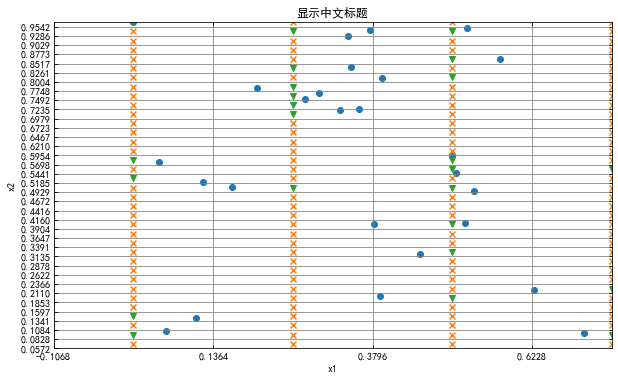

In [15]:
plotting.plot_genx(X_train, gen_x_point, del_x_points, length, n_sample)

In [16]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
#Y_train = np.reshape((-1,1))
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 


In [17]:
gen_y, cov_train = gpr.predict(gen_x_point)


In [18]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Tue, 25 Aug 2020   No. Observations:                   30
Time:                        08:55:18   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [19]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

#models = pd.DataFrame(models, columns=['q', 'a', 'b0', 'b1'])
for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))


 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [20]:
sample_list = []
gen_y2, cov_train2 = gpr.predict(gen_sample_point)
XLim.con_s(gen_sample_point, length, n_sample, sample_list, gen_y2)


#

con_list = []
XLim.con_sample(con_list, X_train, gen_x_point, del_x_points, sample_list, n_sample, length)
XLim.sample_attri(sample_list, X_train, gen_x_point, del_x_points, Y_train)

#

print(np.percentile(Y_train,20))

#

y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]


#

vir_xpoint = []
vir_ypoint = []

1.4143800000000002


In [21]:
import QRselection
import importlib
importlib.reload(QRselection)


QRselection.qr_selection(con_list, models, vir_xpoint, vir_ypoint,y_quantile, gen_x_point, ols)

x1 No.34 gap
Accepted point:
[0.0148     0.94138281]	[2.09027068]
Accepted point:
[0.74445496 0.94138281]	[0.77890239]
x1 No.1 gap
Accepted point:
[0.25801832 0.09562891]	[2.71326284]
Bad point:
[0.50123664 0.09562891]	[1.74685288]
x1 No.17 gap
Bad point:
[0.0148     0.50569141]	[2.87972205]
Accepted point:
[0.74445496 0.50569141]	[1.87958965]
x1 No.19 gap
Bad point:
[0.0148     0.55694922]	[3.11685577]
Bad point:
[0.25801832 0.55694922]	[3.13691686]
x1 No.20 gap
Accepted point:
[0.25801832 0.58257813]	[3.18327067]
Accepted point:
[0.74445496 0.58257813]	[2.0924018]
x1 No.13 gap
Bad point:
[0.0148     0.40317578]	[2.2246991]
Bad point:
[0.25801832 0.40317578]	[2.30294442]
Bad point:
[0.74445496 0.40317578]	[1.29411075]
x1 No.25 gap
Accepted point:
[0.0148     0.71072266]	[2.8883775]
Accepted point:
[0.50123664 0.71072266]	[1.86546793]
Bad point:
[0.74445496 0.71072266]	[1.76430635]
x1 No.27 gap
Bad point:
[0.0148     0.76198047]	[2.56640433]
Accepted point:
[0.50123664 0.76198047]	[1.5

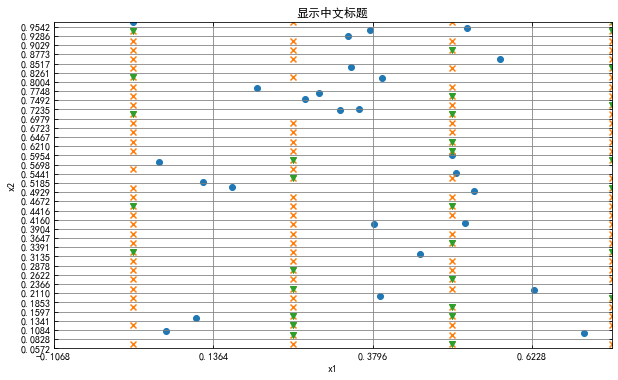

In [22]:
plotting.plot_genx(X_train, gen_x_point, np.array(vir_xpoint), length, n_sample)


